In [ ]:
from langgraph.graph import StateGraph , START , END
from langchain_groq import ChatGroq
from typing import TypedDict
from dotenv import load_dotenv

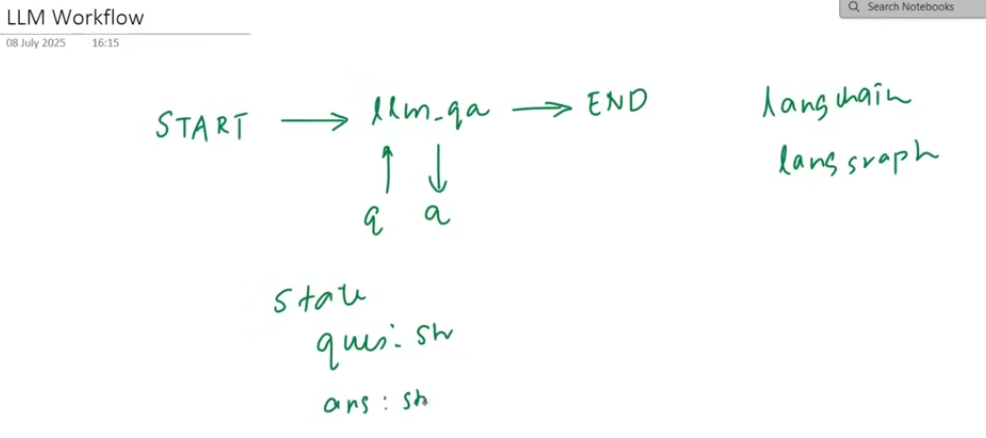

In [11]:
load_dotenv()

True

In [12]:
model = ChatGroq(model="llama-3.1-8b-instant")

In [13]:
# create a state
class LLMState(TypedDict):
    question :  str
    answer : str

In [14]:
def llm_qa(state:LLMState) -> LLMState:
    #extract a question 
    question = state['question']

    #form a prompt 
    prompt = f"Answer the following question precisly: \n {question}"

    #ask the question to the model
    answer = model.invoke(prompt).content

    #update the answer
    state['answer'] = answer

    return state



In [16]:
graph = StateGraph(LLMState)

graph.add_node('llm_qa', llm_qa)

graph.add_edge(START, 'llm_qa')
graph.add_edge('llm_qa',END)

workflow = graph.compile()

In [18]:
initial_state = {"question": "how far the moon is form the earth and whats the gravity on moon compare to earth?"}
final_state = workflow.invoke(initial_state)
print(final_state['answer'])

**Distance from the Earth to the Moon:**
The average distance from the Earth to the Moon is approximately 384,400 kilometers (238,900 miles).

**Gravity on the Moon compared to Earth:**
The surface gravity of the Moon is about 1/6th of the Earth's surface gravity. 

- Earth's surface gravity: 9.8 meters per second squared (m/s^2)
- Moon's surface gravity: 1.62 m/s^2
